<a href="https://colab.research.google.com/github/Kzis/BADS4002/blob/master/pca_iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns_name = ['sepal length','sepal width','petal length','petal width','target']


# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=columns_name)

df

In [0]:
from sklearn.preprocessing import StandardScaler

features = ['sepal length','sepal width','petal length','petal width']

# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['target']].values

# Standardizing the features
x_std = StandardScaler().fit_transform(x)

# df.loc[:, features]
# df.loc[:,['target']]
# pd.DataFrame(x_std, index=df.index, columns=features)

In [0]:
import numpy as np

#1
mean_vec = np.mean(x_std, axis=0)
cov_mat = (x_std - mean_vec).T.dot((x_std - mean_vec)) / (len(x_std)-1)
print('Covariance matrix \n%s' %cov_mat)

#2
cov_mat_numpy = np.cov(x_std.T) 
print('NumPy covariance matrix: \n%s' %np.cov(x_std.T))

In [0]:
eig_vals_cov, eig_vecs_cov = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs_cov)
print('\nEigenvalues \n%s' %eig_vals_cov)

In [0]:
cor_mat1 = np.corrcoef(x_std.T)

eig_vals_cor, eig_vecs_cor = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs_cor)
print('\nEigenvalues \n%s' %eig_vals_cor)

In [0]:
cor_mat2 = np.corrcoef(x.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

In [0]:
u,s,v = np.linalg.svd(x_std.T)
u

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

principalDf

In [0]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

finalDf

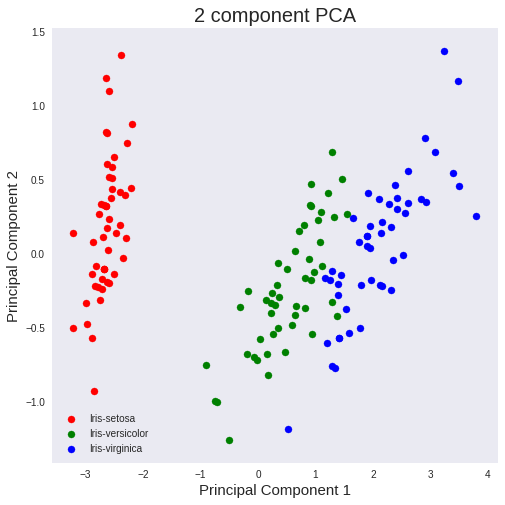

In [0]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()